In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [10]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
        
         # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [11]:
torch.manual_seed(1)

In [17]:
X = torch.arange(-3.0,3.0,0.1).view(-1,1)
f = 1 * X - 1
Y = f + 0.2 * torch.randn(X.size())

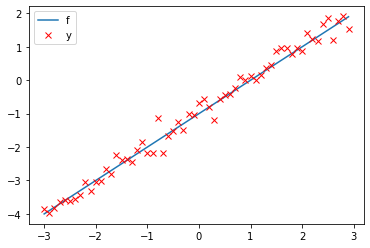

In [18]:
plt.plot(X.numpy(),f.numpy(),label='f')
plt.plot(X.numpy(),Y.numpy(),'rx',label='y')
plt.legend()
plt.show()

In [19]:
def forward(x):
    return w * x + b

In [20]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)


In [22]:
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)

<Figure size 432x288 with 0 Axes>

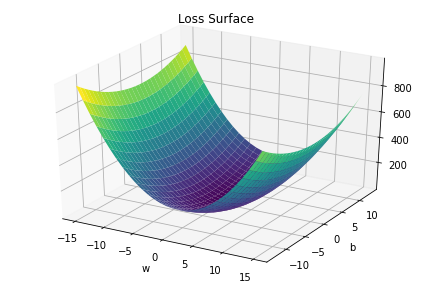

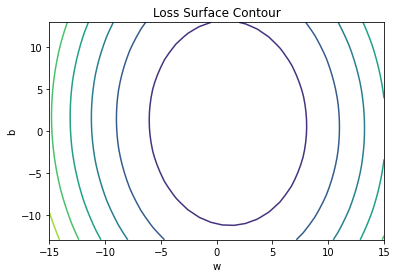

In [28]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

In [31]:
lr = 0.1
LOSS_BGD = []

In [32]:
def my_model(iter):
    for epoch in range(iter):
        yhat = forward(X)
        loss = criterion(yhat,Y)
        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        
        LOSS_BGD.append(loss)
        
        loss.backward()
        
        w.data = w.data-lr*w.grad.data
        b.data = b.data-lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()

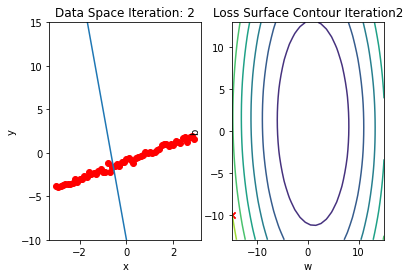

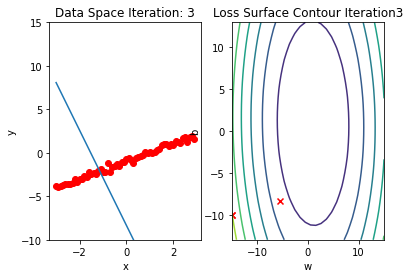

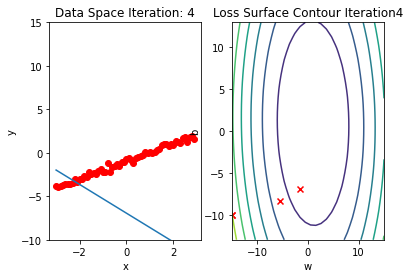

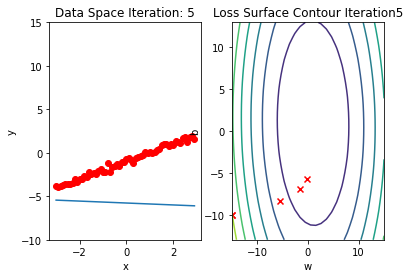

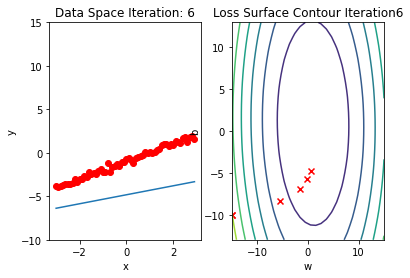

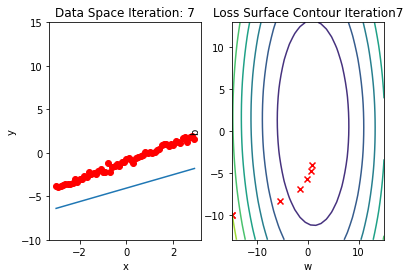

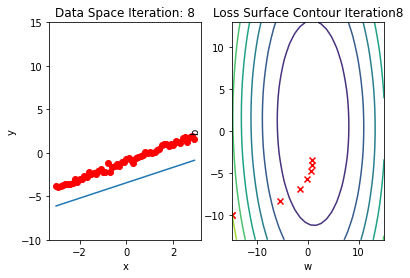

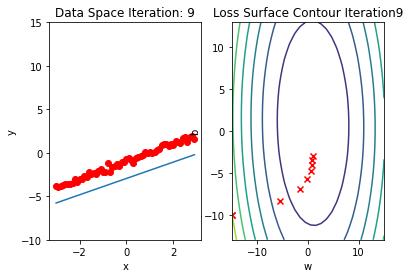

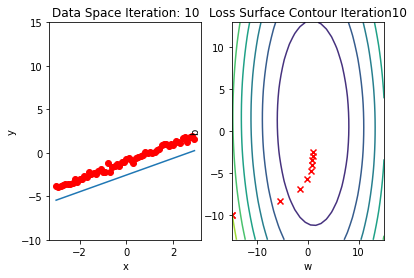

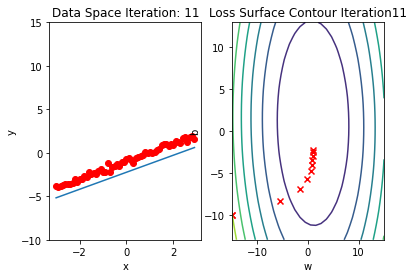

In [33]:
my_model(10)

In [36]:
#Stochastic Gradient Descent
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)

In [37]:
lr = 0.1
LOSS_SGD = []

In [41]:
def train_model_SGD(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        LOSS_SGD.append(criterion(Yhat,Y).tolist())
        for x,y in zip(X,Y):
            yhat = forward(x)
            loss = criterion(yhat,x)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            
            loss.backward()
            
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

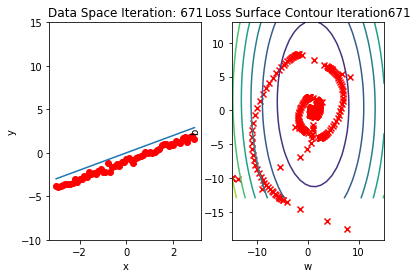

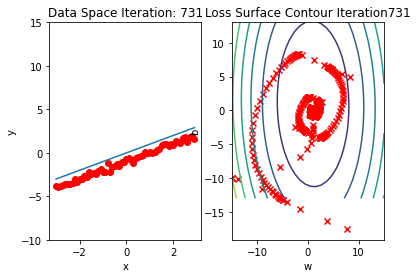

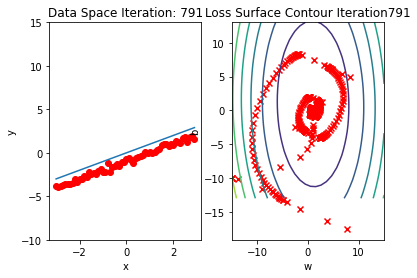

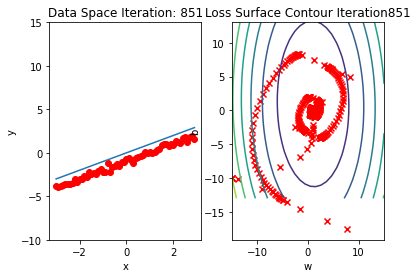

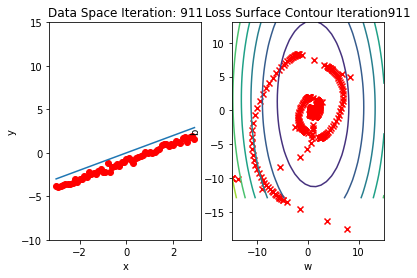

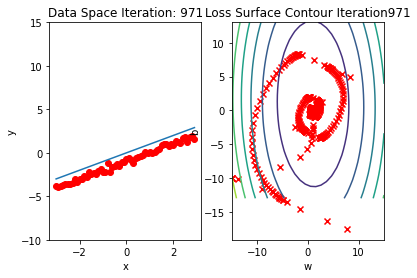

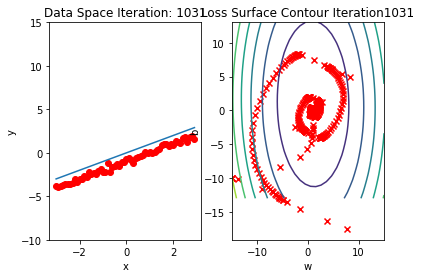

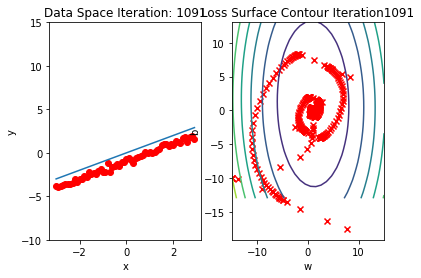

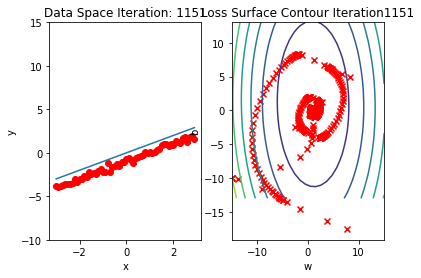

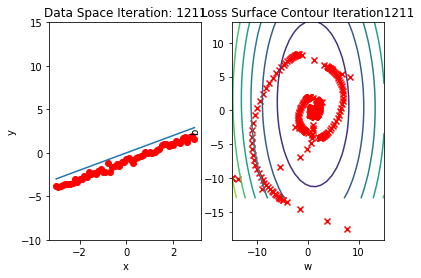

In [42]:
train_model_SGD(10)

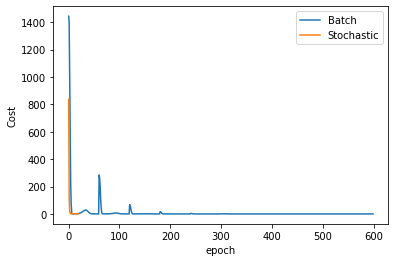

In [43]:
plt.plot(LOSS_BGD,label='Batch')
plt.plot(LOSS_SGD,label='Stochastic')
plt.xlabel('epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

# SGD with Dataset DataLoader

In [44]:
from torch.utils.data import Dataset,DataLoader

In [45]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3.0,3.0,0.1).view(-1,1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len


In [46]:
dataset = Data()
print(len(dataset))

60


In [48]:
x,y = dataset[0]
print(x,y)

tensor([-3.]) tensor([-4.])


In [49]:
dataset[:3]

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000]]),
 tensor([[-4.0000],
         [-3.9000],
         [-3.8000]]))

In [50]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [51]:
trainloader = DataLoader(dataset=dataset,batch_size=1)

In [56]:
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader=[]
def train_model_DataLoader(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_Loader.append(criterion(Yhat,Y).tolist())
        for x,y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat,y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
        
        get_surface.plot_ps()
            

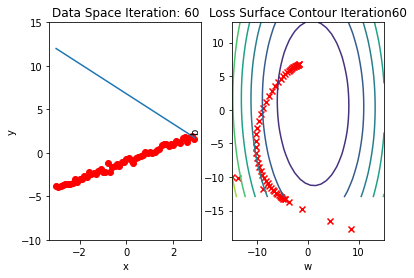

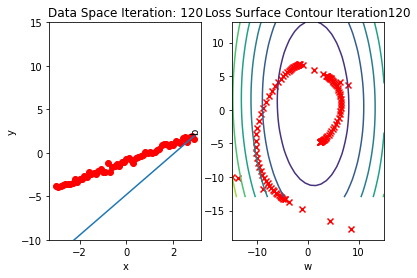

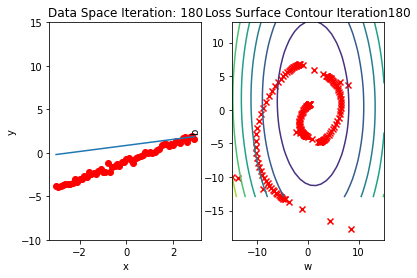

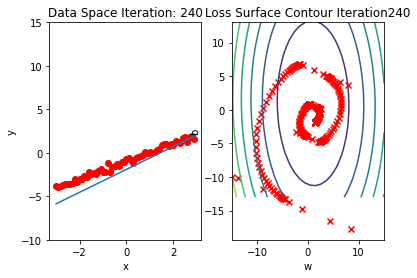

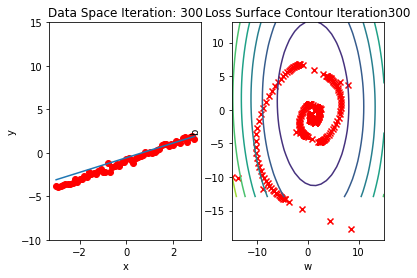

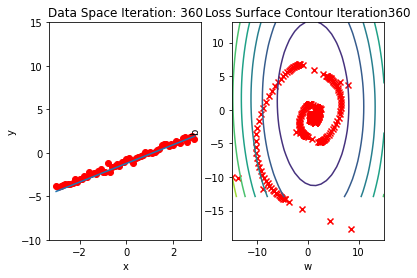

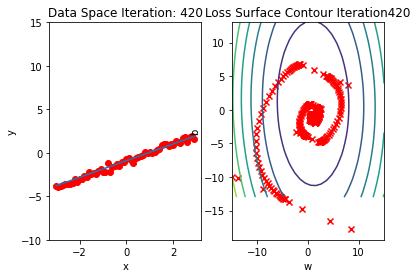

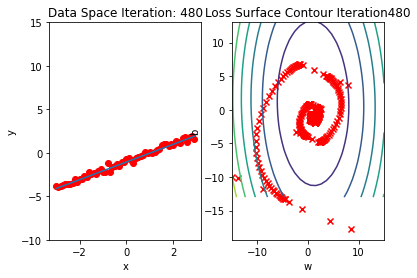

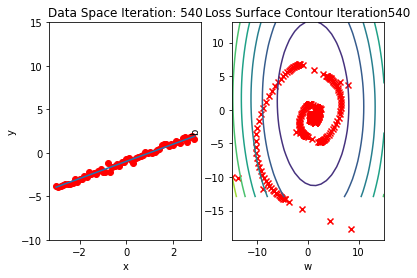

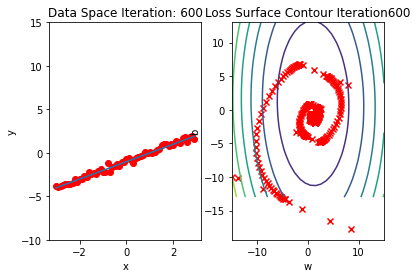

In [57]:
train_model_DataLoader(10)

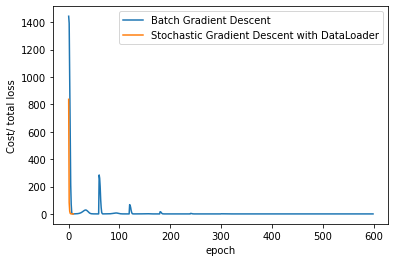

In [58]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()
